In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import cv2, os
import glob
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.optimizer_v2 import rmsprop

In [ ]:
label_dict = {"Fake_img":1,"Real_img":0}
categories = ["Fake_img", "Real_img"]
folder_num = 5

# 구글드라이브 타임아웃 에러 방지용 (한번씩 glob 함으로써 0으로 읽는 거 방지)
# 리얼 흑백이미지 폴더 glob
destination_folder = f'/content/drive/MyDrive/resized/Real_img{folder_num}'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

# 페이크 흑백이미지 폴더 glob
destination_folder = f'/content/drive/MyDrive/resized/Fake_img{folder_num}'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

# 모델 폴더 glob
destination_folder = '/content/drive/MyDrive/model'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

21978
19991
150


In [ ]:
label_dict = {"Fake_img":1,"Real_img":0}
categories = ["Fake_img", "Real_img"]

data=[]
target=[]

# 저장한 흑백 파일들 읽어옴
for category in categories:
    img_names=glob.glob(f"/content/drive/MyDrive/resized/{category}{folder_num}/*.jpg")
    print(len(img_names))

    for idx, img_name in enumerate(img_names):
        img=cv2.imread(img_name)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            data.append(gray)
            target.append(label_dict[category])
            print(category, idx)

        except Exception as e:
            print('Exception:', e)

# target에 제대로 들어갔는지 개수 확인
from collections import Counter
counter = Counter(target)
print("target:",counter)


data=np.array(data)/255.0 # 스케일링
# 모델의 입력은 4차원 텐서여야 함
data=np.reshape(data,(data.shape[0], 100, 100, 1)) # (사진 장수, 가로픽셀, 세로픽셀, 채널)

# 타겟은 2차원 numpy array임
target=np.array(target)
target = to_categorical(target)

# 데이터, 타겟(라벨) 형태 확인
print("data.shape:",data.shape)
print("target.shape:",target.shape)

# Train Test Split
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# (사진 장수, 가로, 세로, 채널) 에서 (가로, 세로, 채널) 입력 사이즈 확인
input_shape=data.shape[1:]
input_shape

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Real_img 16981
Real_img 16982
Real_img 16983
Real_img 16984
Real_img 16985
Real_img 16986
Real_img 16987
Real_img 16988
Real_img 16989
Real_img 16990
Real_img 16991
Real_img 16992
Real_img 16993
Real_img 16994
Real_img 16995
Real_img 16996
Real_img 16997
Real_img 16998
Real_img 16999
Real_img 17000
Real_img 17001
Real_img 17002
Real_img 17003
Real_img 17004
Real_img 17005
Real_img 17006
Real_img 17007
Real_img 17008
Real_img 17009
Real_img 17010
Real_img 17011
Real_img 17012
Real_img 17013
Real_img 17014
Real_img 17015
Real_img 17016
Real_img 17017
Real_img 17018
Real_img 17019
Real_img 17020
Real_img 17021
Real_img 17022
Real_img 17023
Real_img 17024
Real_img 17025
Real_img 17026
Real_img 17027
Real_img 17028
Real_img 17029
Real_img 17030
Real_img 17031
Real_img 17032
Real_img 17033
Real_img 17034
Real_img 17035
Real_img 17036
Real_img 17037
Real_img 17038
Real_img 17039
Real_img 17040
Real_img 17041
Real_img 17042
Real_img 17043
Real_img 17044
Real

(100, 100, 1)

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/aihub/best_model/model44-048-0.0709.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                        

In [ ]:
# 모델 설계
# 1차때만!!!!!
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=data.shape[1:], activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1587))
model.add(Dense(2, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# 업데이트 없으면 미리 학습 중단
early_stopping = EarlyStopping(monitor='val_loss', patience=50)

# 모델 체크포인트
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/model/{epoch:03d}-{val_loss:.4f}.hdf5', # 모델을 저장할 위치 설정!!
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto')

In [ ]:
# 모델 체크포인트
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/model/model55-{epoch:03d}-{val_loss:.4f}.hdf5', # 모델을 저장할 위치 설정!!
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto')

In [ ]:
# 모델 피팅
history=model.fit(x_train, y_train,
                  epochs=100,
                  batch_size=10,
                  callbacks=[checkpoint],
                  validation_data=(X_test, y_test))

Epoch 1/100
3358/3358 [==============================] - ETA: 0s - loss: 0.5956 - accuracy: 0.7364

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3358/3358 [==============================] - 39s 10ms/step - loss: 0.5956 - accuracy: 0.7364 - val_loss: 0.2771 - val_accuracy: 0.9121
Epoch 2/100
3358/3358 [==============================] - 32s 10ms/step - loss: 0.3118 - accuracy: 0.8742 - val_loss: 0.1853 - val_accuracy: 0.9476
Epoch 3/100
3358/3358 [==============================] - 33s 10ms/step - loss: 0.2618 - accuracy: 0.8994 - val_loss: 0.1483 - val_accuracy: 0.9576
Epoch 4/100
3358/3358 [==============================] - 33s 10ms/step - loss: 0.2309 - accuracy: 0.9143 - val_loss: 0.1285 - val_accuracy: 0.9639
Epoch 5/100
3358/3358 [==============================] - 33s 10ms/step - loss: 0.2051 - accuracy: 0.9246 - val_loss: 0.1146 - val_accuracy: 0.9675
Epoch 6/100
3358/3358 [==============================] - 32s 10ms/step - loss: 0.1867 - accuracy: 0.9323 - val_loss: 0.1152 - val_accuracy: 0.9699
Epoch 7/100
3358/3358 [==============================] - 33s 10ms/step - loss: 0.1727 - accuracy: 0.9391 - val_loss: 0.0905 - val_

In [ ]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)
# save to csv:
hist_csv_file = '/content/drive/MyDrive/model/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
his = pd.read_csv("/content/drive/MyDrive/model/history.csv")
his

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,0.595638,0.736441,0.277083,0.912080
1,1,0.311750,0.874192,0.185340,0.947582
2,2,0.261844,0.899419,0.148299,0.957589
3,3,0.230900,0.914341,0.128525,0.963903
4,4,0.205124,0.924617,0.114637,0.967477
...,...,...,...,...,...
95,95,0.018456,0.994967,0.030865,0.991899
96,96,0.021129,0.994490,0.068066,0.987372
97,97,0.020443,0.994192,0.034492,0.990946
98,98,0.018693,0.994847,0.046363,0.990708


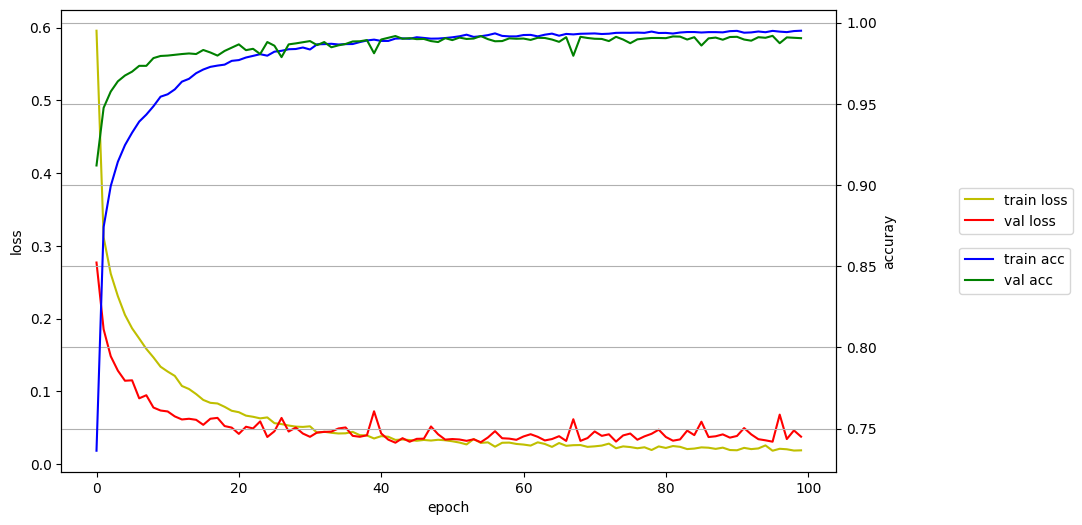

In [ ]:
# 학습 그래프 그리기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,6))
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5))
loss_ax.legend(loc='lower left', bbox_to_anchor=(1.15, 0.5))

plt.grid()
plt.show()

In [3]:
from keras.models import load_model

# 제일 잘된 모델 로드
model = load_model("/content/drive/MyDrive/aihub/best_model/model55-043-0.0295.hdf5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                        

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# X_test로 만든 pred
pred = model.predict(X_test)

263/263 [==============================] - 1s 4ms/step


In [ ]:
# 2차원인 y_test를 1차원으로 변경 (Fake와 Real중 큰 쪽을 택1)
# confusion matrix, f1-score, 재현율, 정확도 구하기 위함

label_test = np.argmax(y_test,axis=1)
label_test

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
# 2차원인 pred_binary를 1차원으로 변경 (Fake와 Real중 큰 쪽을 택1)
# confusion matrix, f1-score, 재현율, 정확도 구하기 위함

label_pred = np.argmax(pred,axis=1)
label_pred

array([0, 1, 0, ..., 1, 0, 1])

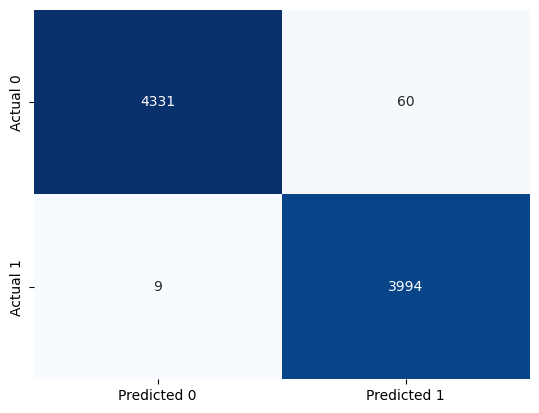

In [ ]:
# confusion matrix 이쁘게
import seaborn as sns
cm = confusion_matrix(label_test, label_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

# F1, acc, recall 구하기
f1_score = f1_score(label_test, label_pred)
acc_score = accuracy_score(label_test, label_pred)
recall_score = recall_score(label_test, label_pred)

print("F1-score:")
print(f"{f1_score:0.5f}")

print("acc-score:")
print(f"{acc_score:0.5f}")

print("recall-score:")
print(f"{recall_score:0.5f}")

F1-score:
0.99144
acc-score:
0.99178
recall-score:
0.99775
